<a href="https://colab.research.google.com/github/Jhon-Fredy-Hernandez-Martinez/TalentoTECH/blob/main/Limpieza_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Limpieza de Datos ***

Una entidad bancaria  contrata a una  empresas de marketing  encargada  de contactar telefónicamente  a posibles clientes para determinar si estan interesados  o no en adquirir un certificado de déposito  a termino fijo.

¿Que perfil tienen los clientes con mayor potencial de conversión?

In [13]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ruta = "/content/dataset_banco.csv"
data= pd.read_csv(ruta)

Observamos cuantas filas y columnas tenemos en nuestra Base de Datos

In [5]:
print(data.shape)

(45215, 17)


Visualizamos los primeros datos

In [9]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


Se observan las variables tanto categoricas como númericas

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


1. Datos Faltantes en alguna celda. Celdas en blanco
2. Columnas irrelevantes. Hobbies del usuario, comida favorita.
3. Registros repetidos. dos o más celdas con igual información.
4. Valores extremos (outliers) edades de 200 años en adelante.
5. Errores tipográficos en el caso de variables categóricas. Arital -> Marital





#Elimina la fila completa donde encuentra datos faltantes

In [14]:
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [21]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in cols_cat:
    print(f'Column {col}: {data[col].nunique()} sub-levels')


Column job: 18 sub-levels
Column marital: 6 sub-levels
Column education: 10 sub-levels
Column default: 2 sub-levels
Column housing: 2 sub-levels
Column loan: 6 sub-levels
Column contact: 5 sub-levels
Column month: 12 sub-levels
Column poutcome: 6 sub-levels
Column y: 2 sub-levels


Analisis de Estadisticos Descriptivos: Si la desviación estandar es igual a cero significa que todos los datos de esa fila son cero y no proporcionan informacion relevante

In [23]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Eliminamos las filas duplicadas

In [ ]:
print(f'Tamaño de l set  antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño de l set  despues de eliminar las filas repetidas: {data.shape}')

Analizamos la presencia de Valores Extremos (Outliers)

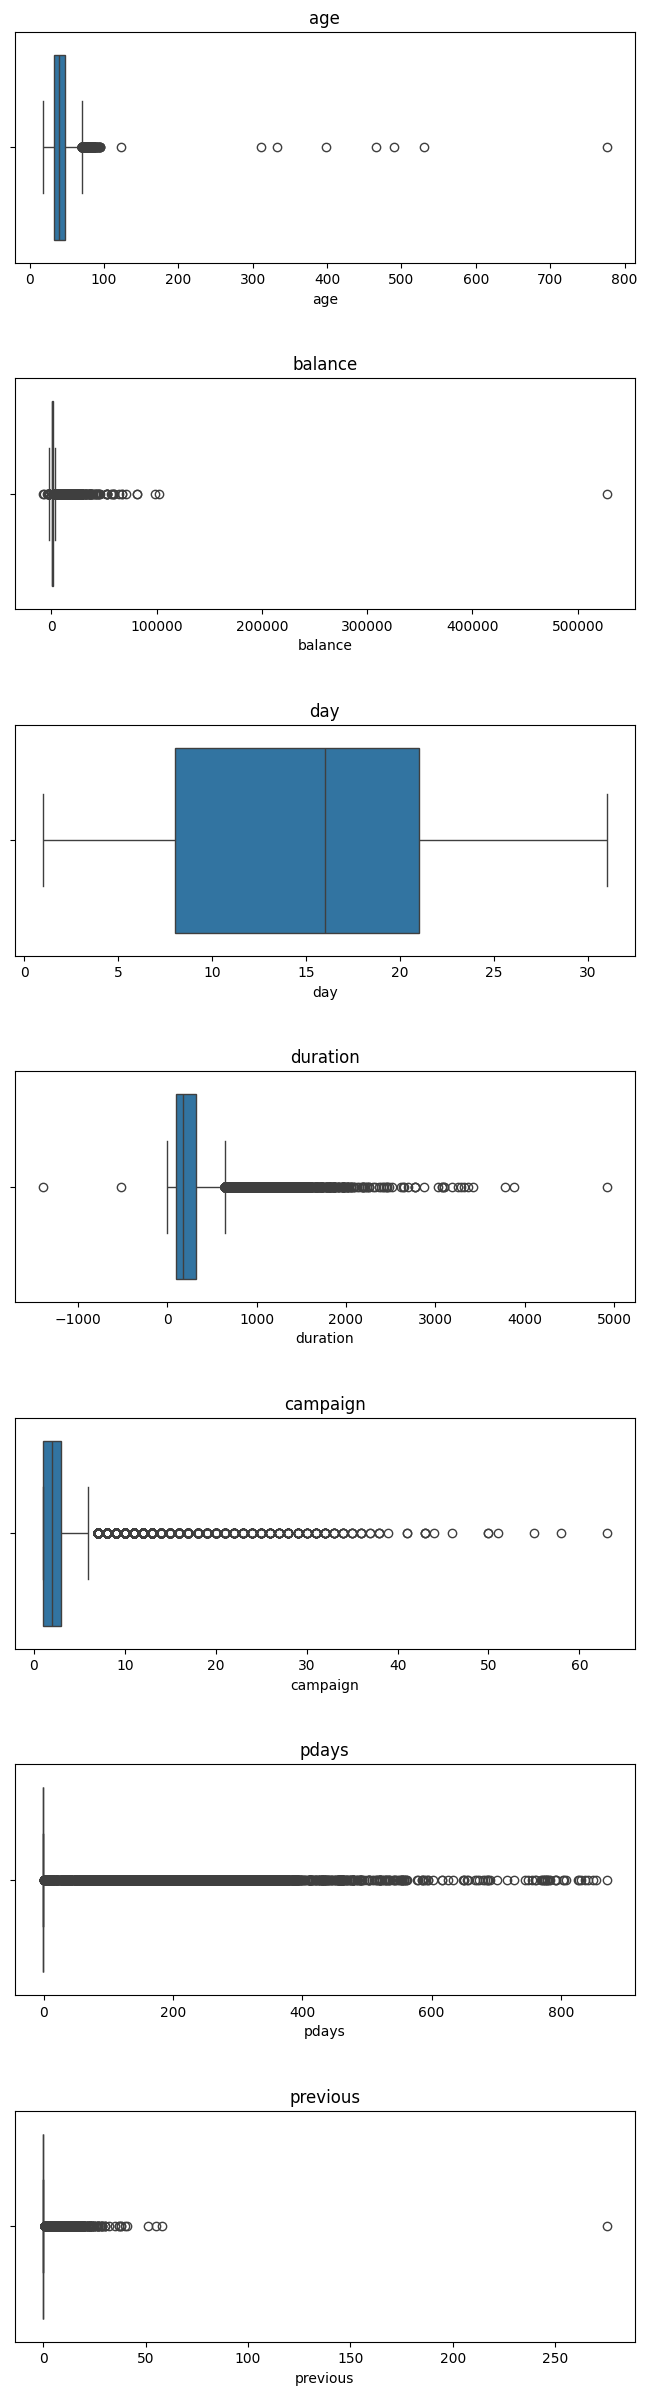

In [26]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)


**Edad**

In [27]:
print(f'Tamaño de l set  antes de eliminar los registros de edad: {data.shape}')
data=data[data['age']<100]
print(f'Tamaño de l set  despues de eliminar los registros de edad: {data.shape}')

Tamaño de l set  antes de eliminar los registros de edad: (45203, 17)
Tamaño de l set  despues de eliminar los registros de edad: (45195, 17)


**Duración**

In [28]:
print(f'Tamaño de l set  antes de eliminar los registros de duration: {data.shape}')
data=data[data['duration']>0]
print(f'Tamaño de l set  despues de eliminar los registros de duration: {data.shape}')

Tamaño de l set  antes de eliminar los registros de duration: (45195, 17)
Tamaño de l set  despues de eliminar los registros de duration: (45190, 17)


In [30]:
print(f'Tamaño de l set  antes de eliminar los registros de previous: {data.shape}')
data=data[data['previous']<=100]
print(f'Tamaño de l set  despues de eliminar los registros de previous: {data.shape}')

Tamaño de l set  antes de eliminar los registros de previous: (45190, 17)
Tamaño de l set  despues de eliminar los registros de previous: (45189, 17)
